In [1]:
import os
from pathlib import Path
if '_cwd' not in locals():
    _cwd = os.getcwd()
    os.chdir(Path(_cwd)/'..')
    os.chdir(Path(os.getcwd())/'..') # ew

import numpy as np


%matplotlib inline
import matplotlib.pyplot as plt


# add automatic reloading of modules
%load_ext autoreload
%autoreload 2

Loading data and model

In [2]:
import pandas as pd

data_path = "data/eog/EOG.parquet"
df = pd.read_parquet(data_path)

df.columns

Index(['dim_0', 'target', 'dataset'], dtype='object')

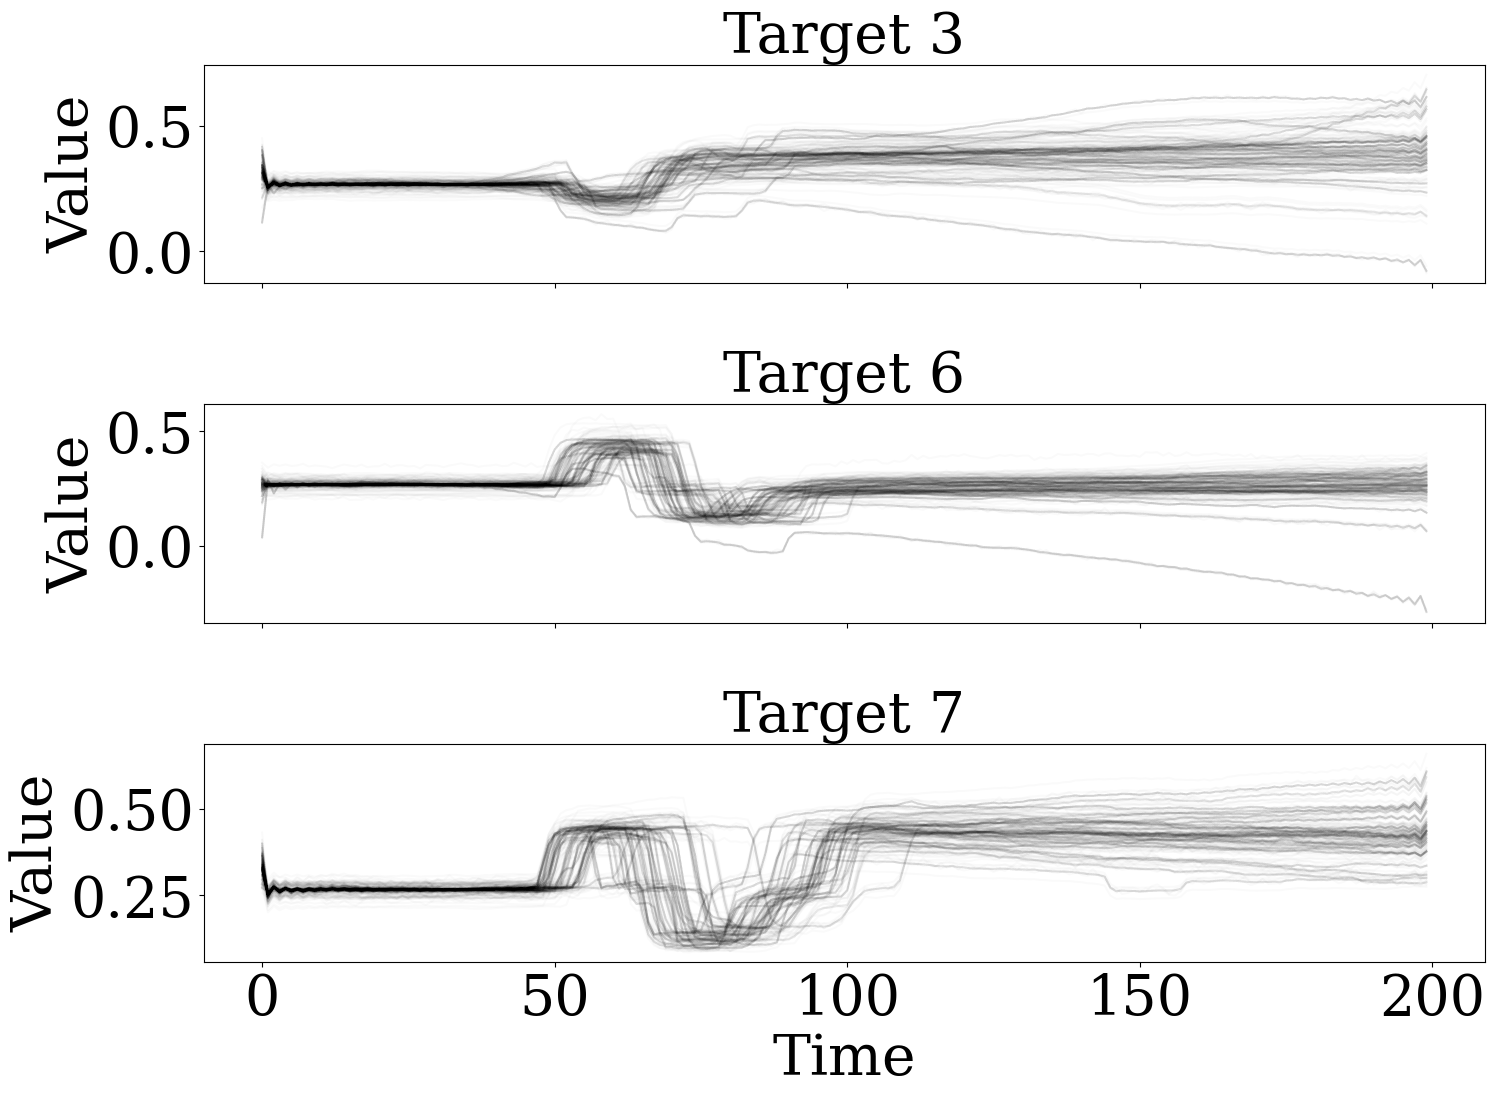

In [4]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd  

# ✅ Set Matplotlib font to match LaTeX
font_fix = 30
plt.rcParams.update({
    "text.usetex": False,  
    "font.family": "serif",
    "font.size": 11 + font_fix,
    "axes.titlesize": 11 + font_fix,
    "axes.labelsize": 11+ font_fix,
    "xtick.labelsize": 10+ font_fix,
    "ytick.labelsize": 10+ font_fix,
    "legend.fontsize": 10+ font_fix,
    "savefig.dpi": 300,
})

# Extract unique targets
unique_targets = df["target"].unique()

# ✅ Change to vertical layout
fig, axes = plt.subplots(len(unique_targets), 1, figsize=(16, 4 * len(unique_targets)), sharex=True)

if len(unique_targets) == 1:
    axes = [axes]  # Ensure axes is iterable

for ax, target in zip(axes, unique_targets):
    target_data = df[df["target"] == target]
    
    if isinstance(target_data["dim_0"].iloc[0], (list, tuple, pd.Series, np.ndarray)):
        for idx, row in target_data.iterrows():
            ax.plot(range(len(row["dim_0"])), row["dim_0"], color="black", alpha=0.02)
    else:
        ax.plot(target_data["dim_0"], color="black")

    ax.set_title(f"Target {target}")
    ax.set_ylabel("Value")

axes[-1].set_xlabel("Time")  # ✅ Only bottom plot gets xlabel

# ✅ Trim whitespace & save
plt.tight_layout()
plt.show()

Global Y limits: -0.29 to 0.70
Loaded heatmap for target 3 with shape (200, 200)
Loaded heatmap for target 6 with shape (200, 200)


/tmp/ipykernel_4174816/1401065356.py:62: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap(obj)`` instead.
  cmap = mpl.cm.get_cmap("YlOrRd").copy()


Loaded heatmap for target 7 with shape (200, 200)


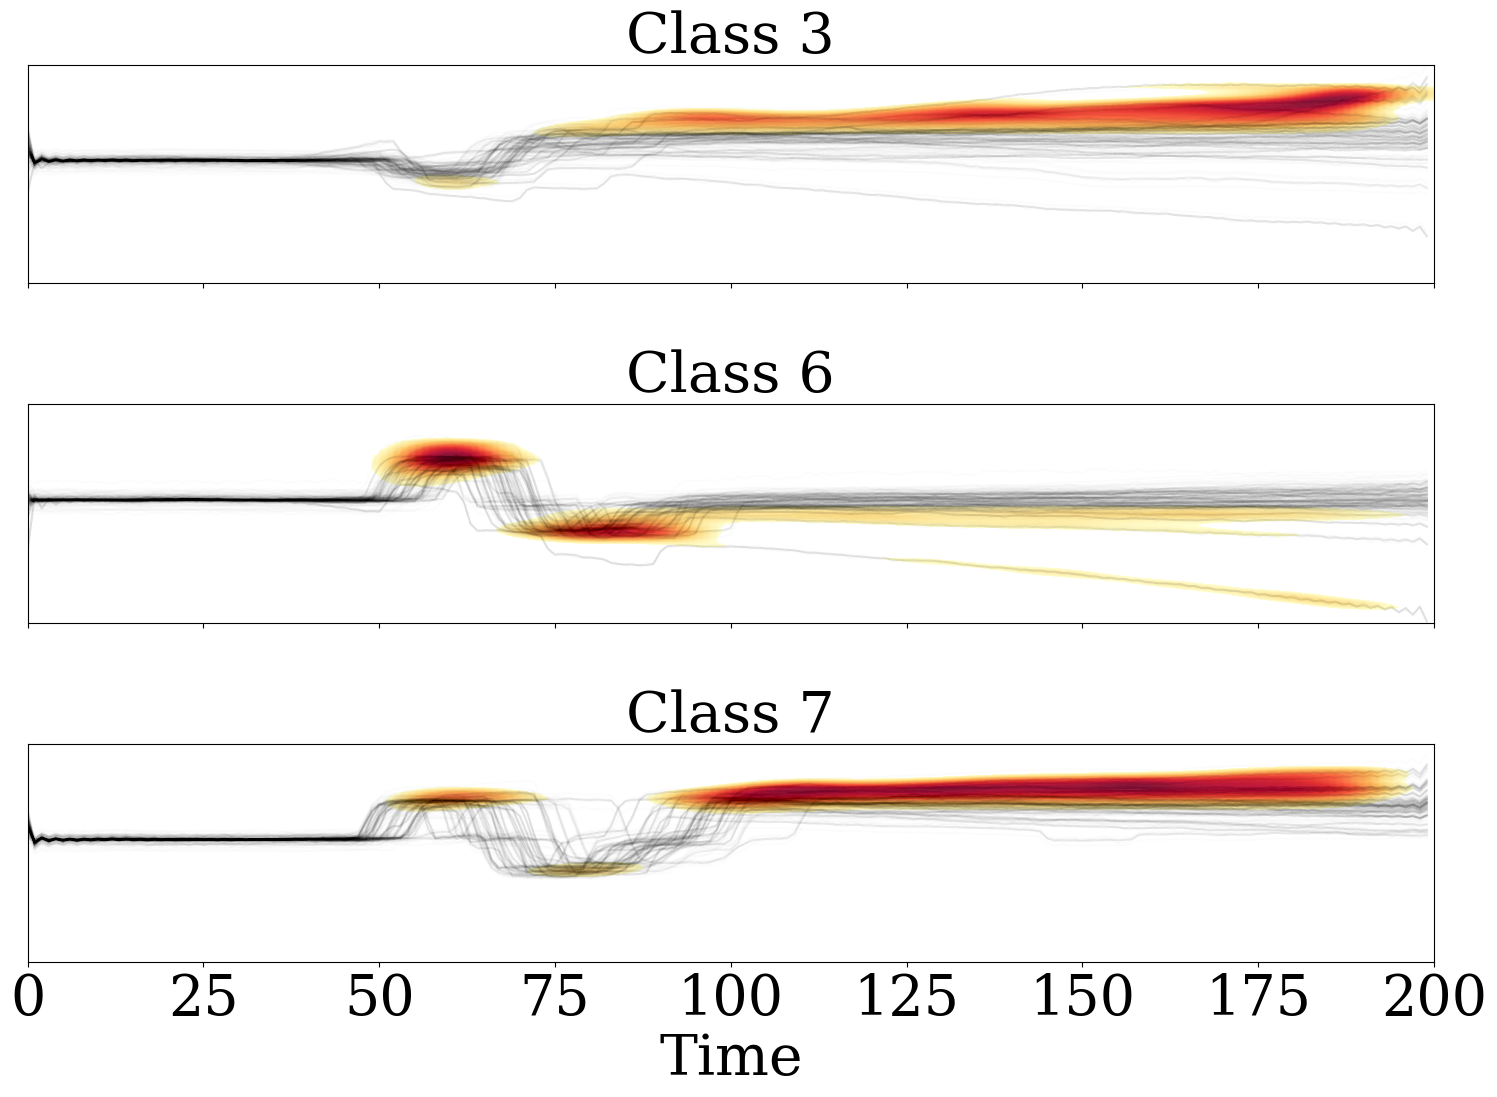

In [ ]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import matplotlib as mpl

# ✅ Matplotlib font setup
font_fix = 30
plt.rcParams.update({
    "text.usetex": False,
    "font.family": "serif",
    "font.size": 11 + font_fix,
    "axes.titlesize": 11 + font_fix,
    "axes.labelsize": 11 + font_fix,
    "xtick.labelsize": 10 + font_fix,
    "ytick.labelsize": 10 + font_fix,
    "legend.fontsize": 10 + font_fix,
    "savefig.dpi": 300,
})

# ✅ Extract unique targets
unique_targets = df["target"].unique()

# ✅ Load heatmaps as dictionary
heatmaps_data = np.load("data/eog/heatmaps_eog.npy", allow_pickle=True).item()

# ✅ Compute global axis limits
global_ymin = df["dim_0"].explode().min()
global_ymax = df["dim_0"].explode().max()

# Assuming all time series have the same length
ts_len = len(df["dim_0"].iloc[0])
global_xmin, global_xmax = 0, ts_len

print(f"Global Y limits: {global_ymin:.2f} to {global_ymax:.2f}")

# ✅ Plotting setup
fig, axes = plt.subplots(len(unique_targets), 1, figsize=(16, 4 * len(unique_targets)), sharex=True)
if len(unique_targets) == 1:
    axes = [axes]

for i, (ax, target) in enumerate(zip(axes, unique_targets)):

    target_data = df[df["target"] == target]
    correction = 0
    if target == '3':
        correction = 0.1
    elif target == '7':
        correction = 0.1
    elif target == '6':
        correction = -0.1

    # ✅ Plot all trajectories
    for idx, row in target_data.iterrows():
        ts = np.array(row["dim_0"])
        ax.plot(range(len(ts)), ts, color="black", alpha=0.01)

    # ✅ Load heatmap properly
    heatmap = heatmaps_data[(str(target), 0)]
    print(f"Loaded heatmap for target {target} with shape {heatmap.shape}")

    # ✅ Colormap
    cmap = mpl.cm.get_cmap("YlOrRd").copy()
    cmap.set_under((0, 0, 0, 0))

    vmin = np.percentile(heatmap, 90)

    # ✅ Plot heatmap overlay
    extent = [0, ts_len, global_ymin, global_ymax]

    ax.imshow(heatmap.T,
              extent=extent,
              aspect='auto',
              origin='lower',
              cmap=cmap,
              alpha=0.9,
              vmin=vmin)

    # ✅ Fix x and y limits globally
    ax.set_xlim(global_xmin, global_xmax)
    ax.set_ylim(global_ymin, global_ymax)

    ax.set_title(f"Class {target}")
    ax.set_ylabel("Value")

axes[-1].set_xlabel("Time")

# diszble y axis
for ax in axes:
    ax.get_yaxis().set_visible(False)
    
plt.tight_layout()
plt.show()
